In [2]:
import pandas as pd
df=pd.read_csv('cleaned_data.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings 
warnings.filterwarnings("ignore")

# Uni Varient

### What is the typical price range for a used car in this market? Are there many luxury/expensive cars, or is the market mostly budget-friendly?

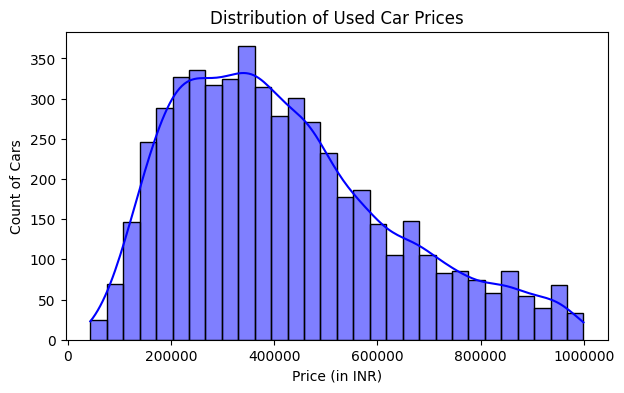

Minimum Price: 44000
Maximum Price: 999000
Average Price: 419531.88
Median Price: 383000.0


In [8]:


plt.figure(figsize=(7, 4))

sns.histplot(df['price'], kde=True, color='blue', bins=30)

plt.title('Distribution of Used Car Prices')
plt.xlabel('Price (in INR)')
plt.ylabel('Count of Cars')
plt.gca().ticklabel_format(style='plain', axis='x') 
plt.show()

print("Minimum Price:", df['price'].min())
print("Maximum Price:", df['price'].max())
print("Average Price:", round(df['price'].mean(), 2))
print("Median Price:", df['price'].median())

#### Insights:

* You will likely see a "tail" on the right side. This confirms the market is Right-Skewed, meaning there are many affordable cars (e.g., under ₹5 Lakh) and very few expensive ones.

* The peak of the graph shows the most common budget range (likely ₹3L - ₹5L).

### Which car brands are most readily available? Does the market favor specific manufacturers?

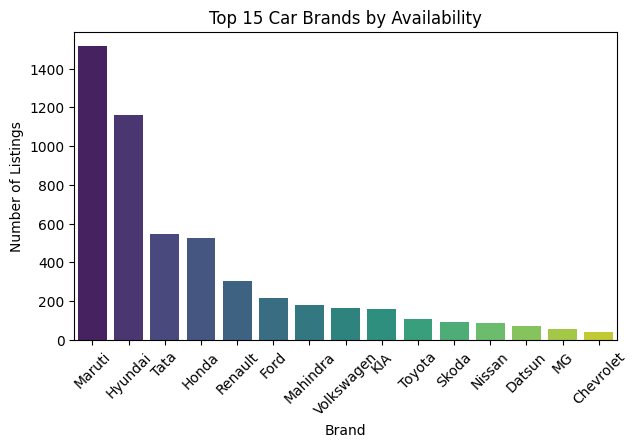

Top 2 Brands (Maruti & Hyundai) capture 50.59% of the market.


In [9]:
plt.figure(figsize=(7, 4))

top_brands = df['brand'].value_counts().head(15).index

sns.countplot(x='brand', data=df[df['brand'].isin(top_brands)], 
              order=top_brands, palette='viridis')
plt.title('Top 15 Car Brands by Availability')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()
top_2 = df['brand'].value_counts().head(2)
share = (top_2.sum() / len(df)) * 100
print(f"Top 2 Brands ({top_2.index[0]} & {top_2.index[1]}) capture {share:.2f}% of the market.")

#### Insights:

* As seen earlier, Maruti and Hyundai will likely dominate.

* If a customer wants a niche brand (like Skoda or Nissan), they have significantly fewer options to choose from.

### Is the used car market dominated by Petrol or Diesel? Are alternative fuels like CNG or Electric gaining traction?

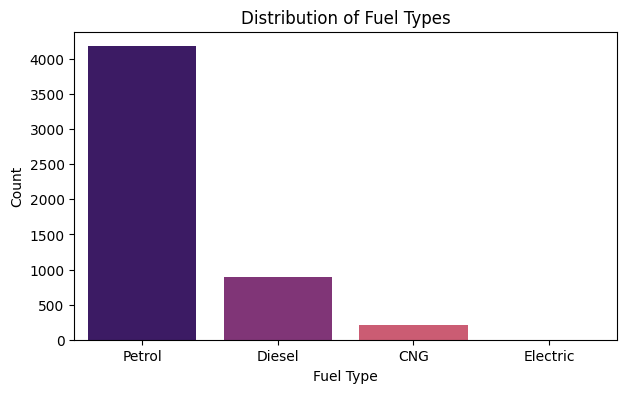

fuel
Petrol      79.009077
Diesel      16.962935
CNG          3.990166
Electric     0.037821
Name: proportion, dtype: float64


In [10]:
plt.figure(figsize=(7, 4))
sns.countplot(x='fuel', data=df, palette='magma', order=df['fuel'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

print(df['fuel'].value_counts(normalize=True) * 100)

#### Insight:

* Petrol cars are dominates the car market by having 79% followed by Diesel with 16%
* The CNG and Electric are available less 

### How easy is it to find an Automatic car? Is the market still predominantly Manual?

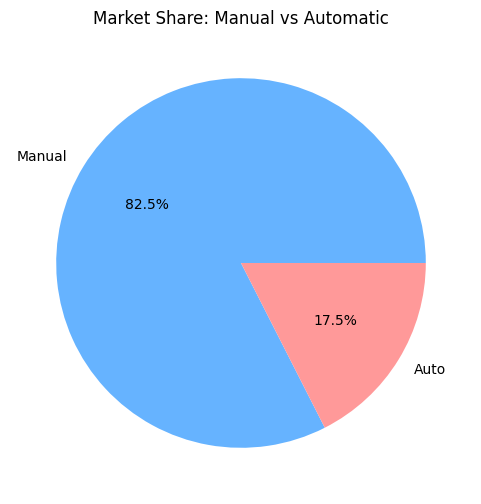

In [50]:
plt.figure(figsize=(6, 6))
transmission_counts = df['transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Market Share: Manual vs Automatic')
plt.show()

#### Insight:
* Automatics are rare  < 20%, sellers can charge a premium for them because demand often exceeds supply in city traffic conditions.

### What is the average usage of a used car? Are most cars heavily used (>1 Lakh km) or sparsely used?

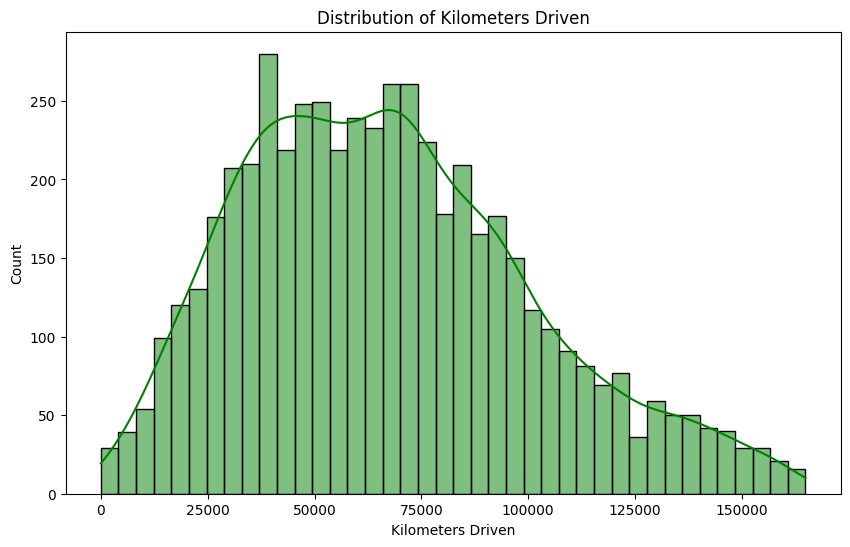

Cars driven more than 1,00,000 KM: 865


In [51]:
plt.figure(figsize=(10, 6))

sns.histplot(df['km'], kde=True, color='green', bins=40)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Count')
plt.show()
print("Cars driven more than 1,00,000 KM:", len(df[df['km'] > 100000]))

#### Insight:
* Most cars will likely cluster between 40,000 km and 80,000 km.

* A car with very high km_driven (e.g., >1.2 Lakh km) is a higher risk for the buyer, which should be reflected in a lower price.

# Bi - Varient Analysis

### How rapidly does a car lose its value over time? At what age does the price stabilize?

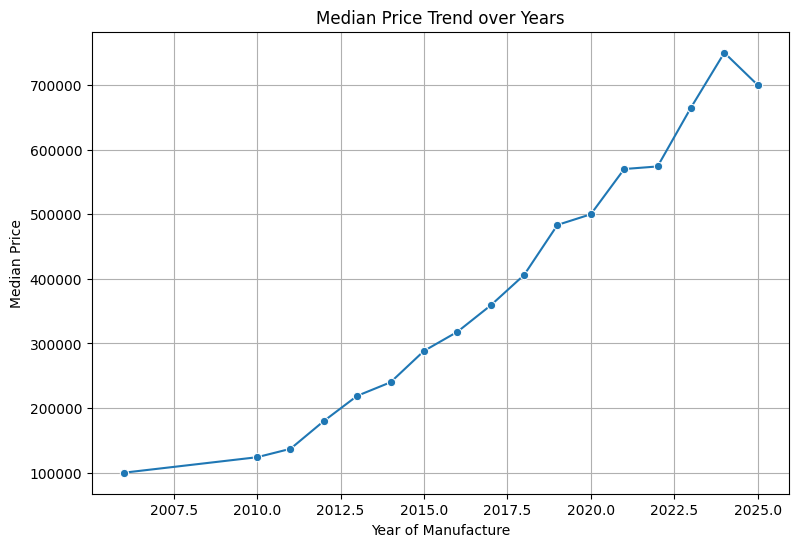

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.lineplot(data=df, x='year', y='price', estimator='median', marker='o', ci=None)
plt.title('Median Price Trend over Years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

Insight:

Depreciation Curve: You should see a steep upward curve. Cars from 2020-2023 will likely have the highest prices.

Value Retention: Look at the years 2015-2017. If the line flattens out here, it means cars older than 7 years stop losing value quickly, making them good budget buys.

### Does high mileage significantly reduce the car's price, or does the brand matter more?

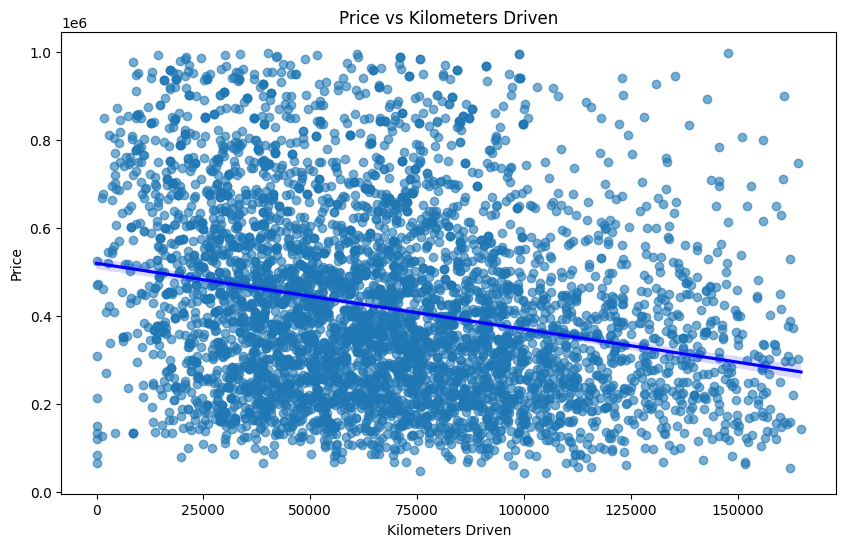

In [7]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='km', y='price', scatter_kws={'alpha':0.6},line_kws={'color':'blue'})
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

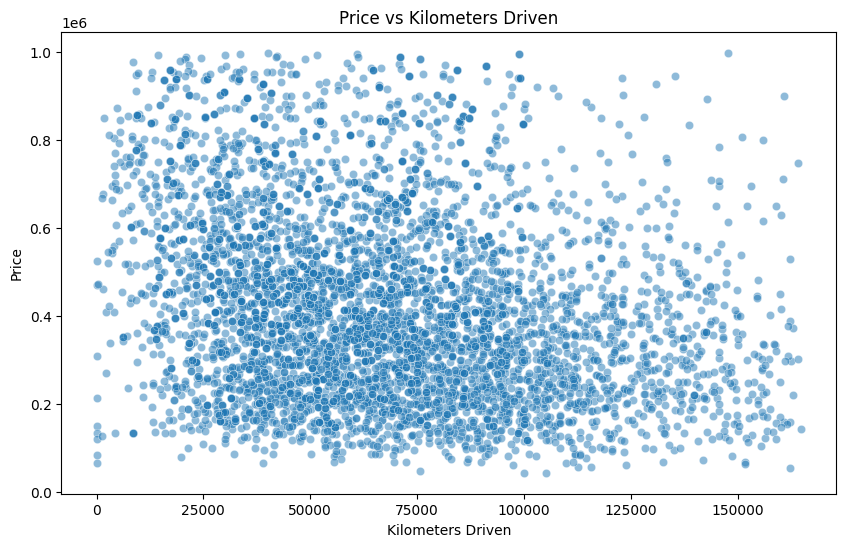

             km     price
km     1.000000 -0.243463
price -0.243463  1.000000


In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='km', y='price', alpha=0.5)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

print(df[['km', 'price']].corr())

Insight:

Negative Correlation: You will see a trend where price drops as KM increases (points moving down-right).

The "Safe" Zone: Most high-value cars will be clustered under 60,000 KM. Cars with over 1,00,000 KM usually sell for a "scrap" or base price regardless of the brand.

### Which brands command a premium price in the second-hand market?

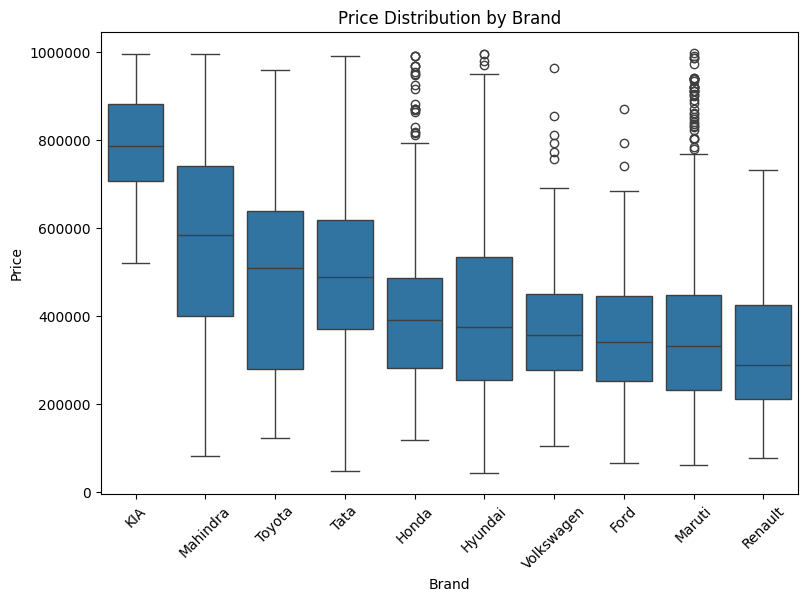

In [16]:
plt.figure(figsize=(9, 6))
top_brands = df['brand'].value_counts().head(10).index
filtered_df = df[df['brand'].isin(top_brands)]

sorted_order = filtered_df.groupby('brand')['price'].median().sort_values(ascending=False).index

sns.boxplot(data=filtered_df, x='brand', y='price', order=sorted_order)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()

Insight:

Brand Hierarchy: The box plot sorts brands from most expensive (left) to cheapest (right). You will likely see Toyota, Honda, or Volkswagen on the higher end and Datsun or Renault on the lower end.

Price Variation: Longer boxes indicate that the brand has a mix of cheap and expensive models (e.g., Mahindra has both Bolero and XUV700).

### Is it worth paying extra for an Automatic car? How big is the price gap?

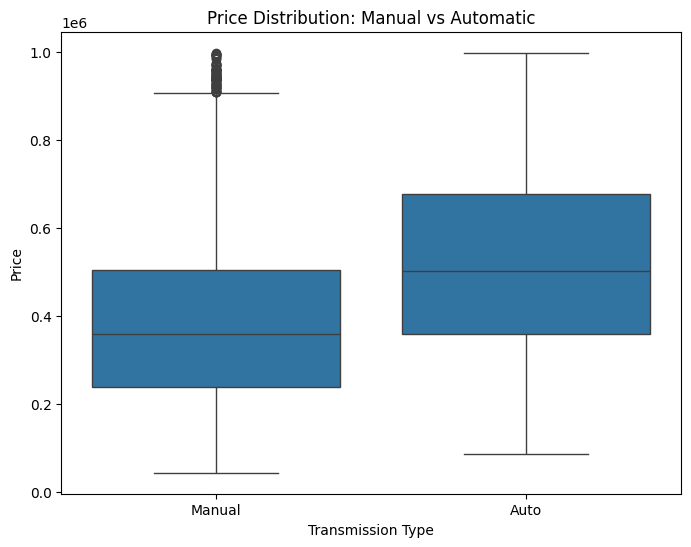

transmission
Auto      501999.0
Manual    360000.0
Name: price, dtype: float64


In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution: Manual vs Automatic')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

print(df.groupby('transmission')['price'].median())

Insight:

The Automatic Premium: Compare the median lines (the line inside the box). Automatic cars usually trade at a ₹1.5 Lakh to ₹2 Lakh premium over Manuals.

Target Audience: If the gap is huge, budget buyers are strictly limited to Manual cars.

### Are Diesel cars still valuable despite regulatory concerns?

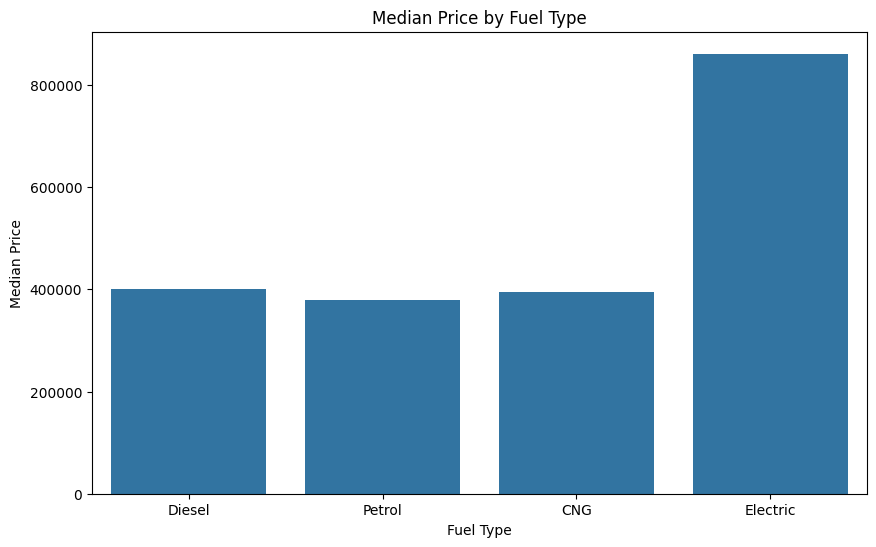

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='fuel', y='price', estimator='median', ci=None)
plt.title('Median Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Median Price')
plt.show()

### Insight:

Diesel Value: Diesel cars often have a higher median price than Petrol because they are usually the larger SUVs (like Fortuner, Innova, Creta).

CNG Economy: CNG cars will likely have the lowest median price, confirming they are targeted at the economy segment.

### Does the location (RTO) of the car affect its price? Are cars from Delhi or Mumbai priced differently?

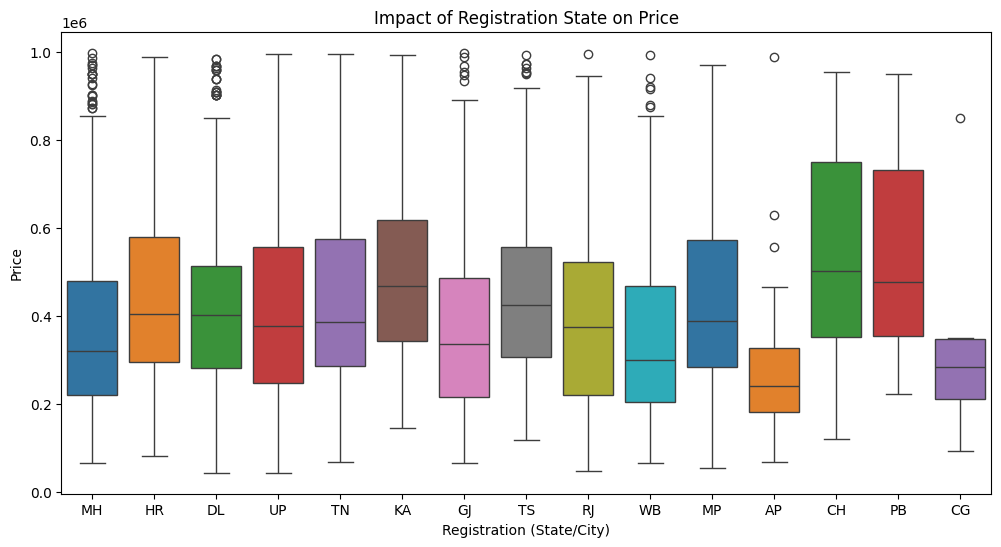

Top 5 Locations by Supply:
 registration
MH    754
HR    717
DL    661
UP    510
TN    468
Name: count, dtype: int64


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

top_regs = df['registration'].value_counts().head(15).index

sns.boxplot(data=df[df['registration'].isin(top_regs)], x='registration', y='price', order=top_regs, palette='tab10')

plt.title('Impact of Registration State on Price')
plt.xlabel('Registration (State/City)')
plt.ylabel('Price')
plt.show()

# Print the top locations
print("Top 5 Locations by Supply:\n", df['registration'].value_counts().head(5))

#### insights
The visualization confirms that Location is a Price Driver. A car registered in Karnataka commands a premium over an identical car registered in Delhi, driven by tax structures and regulatory lifespan limits

### Can we create a custom category to identify Hidden Gems cars that are barely used but available at a second-hand price?

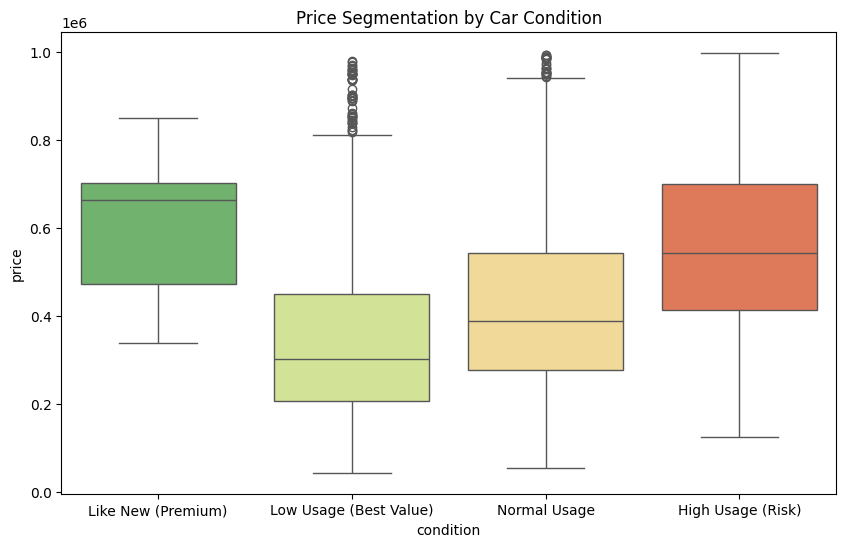

condition
Normal Usage              2198
Low Usage (Best Value)    2144
High Usage (Risk)          925
Like New (Premium)          21
Name: count, dtype: int64


In [66]:

current_year = df['year'].max()
df['age'] = current_year - df['year']

def categorize_condition(row):
    age = row['age'] if row['age'] > 0 else 1
    avg_usage = row['km'] / age
    
    if row['age'] <= 2 and row['km'] < 5000:
        return 'Like New (Premium)'
    elif avg_usage < 8000:
        return 'Low Usage (Best Value)'
    elif avg_usage > 15000:
        return 'High Usage (Risk)'
    else:
        return 'Normal Usage'

df['condition'] = df.apply(categorize_condition, axis=1)

plt.figure(figsize=(10, 6))
order = ['Like New (Premium)', 'Low Usage (Best Value)', 'Normal Usage', 'High Usage (Risk)']
sns.boxplot(data=df, x='condition', y='price', order=order, palette='RdYlGn_r')
plt.title('Price Segmentation by Car Condition')
plt.show()
print(df['condition'].value_counts())

### Insights
Low Usage" cars and Normal usage  cars are  best sellers. They offer the customer a "good-as-new" feel without the premium price 

# How many cars of each brand avaliable in each location (top 10 brands in top 10 cities)

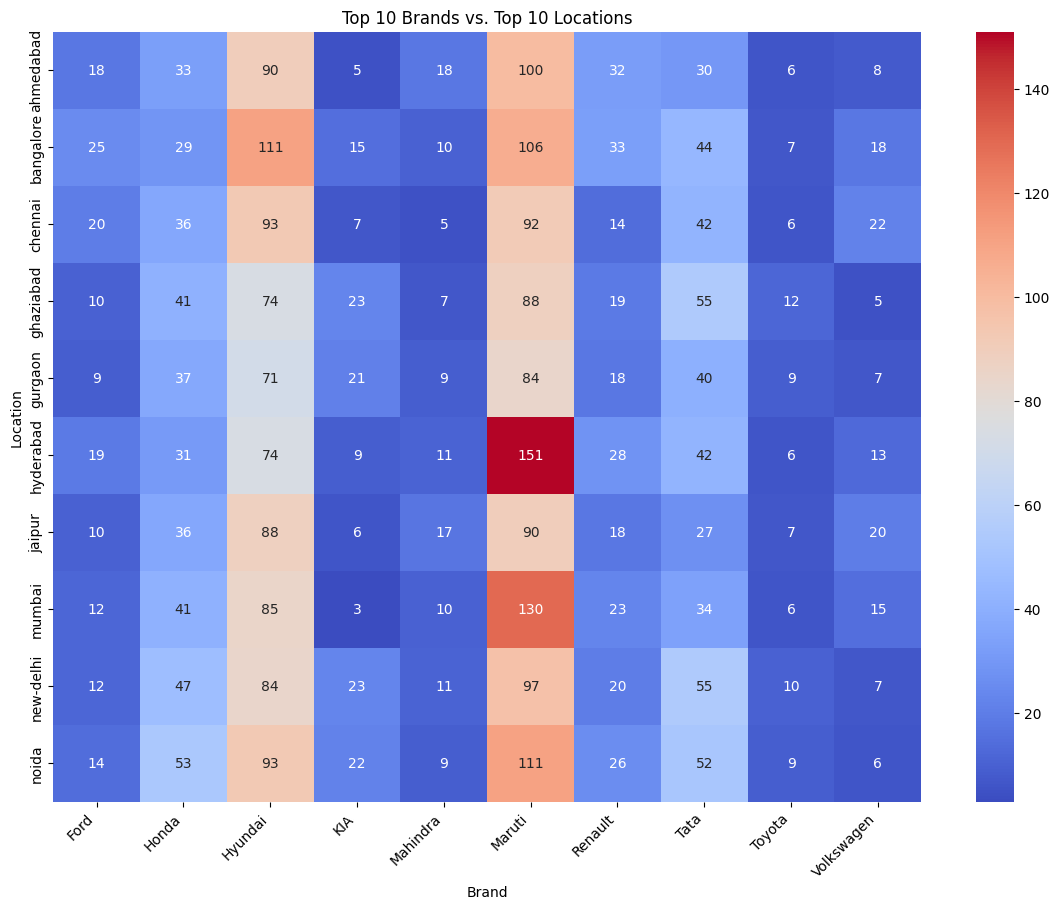

In [11]:
top_10_brands = df['brand'].value_counts().head(10).index
top_10_locations = df['location'].value_counts().head(10).index
    
df_top_cat = df[df['brand'].isin(top_10_brands) & df['location'].isin(top_10_locations)]
location_brand_ct = pd.crosstab(df_top_cat['location'], df_top_cat['brand'])

plt.figure(figsize=(14, 10))
sns.heatmap(
    location_brand_ct, 
    annot=True,    
    fmt='d',        
    # cmap='viridis'
    cmap='coolwarm'
)
plt.title('Top 10 Brands vs. Top 10 Locations')
plt.xlabel('Brand')
plt.ylabel('Location')
plt.xticks(rotation=45, ha='right')
plt.show() 

* This heatmap shows brand availability by city.
+  While **Maruti Suzuki** and **Hyundai** are likely common everywhere (dark colors across their rows), it might show that **Mahindra** is exceptionally common in one city but less so in another.
+   This helps a buyer understand their local inventory.

# Multi Varient Analysis

### What is the single biggest factor that determines the price of a used car?

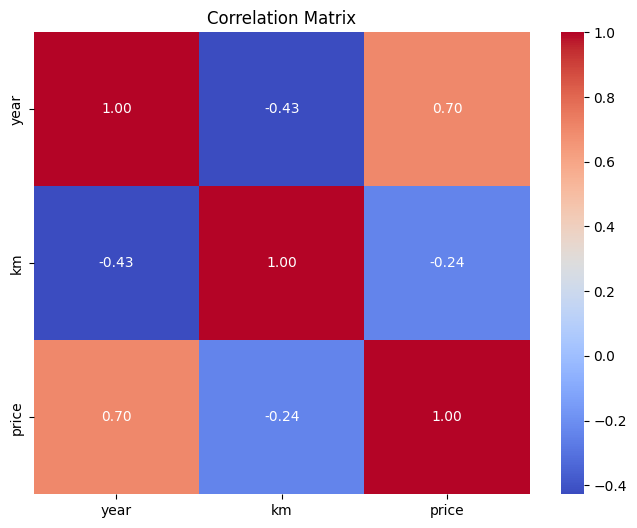

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Insight:

Dominant Factor: Year has the strongest positive correlation (0.70) with Price. This confirms that age is the primary value driver.

Usage Impact: KM Driven has a negative correlation (-0.24). While significant, it is much weaker than the Year. This means a newer car with high mileage is often worth more than an older car with low mileage.

## Is the price gap between Automatic and Manual cars consistent, or does it widen for newer models?

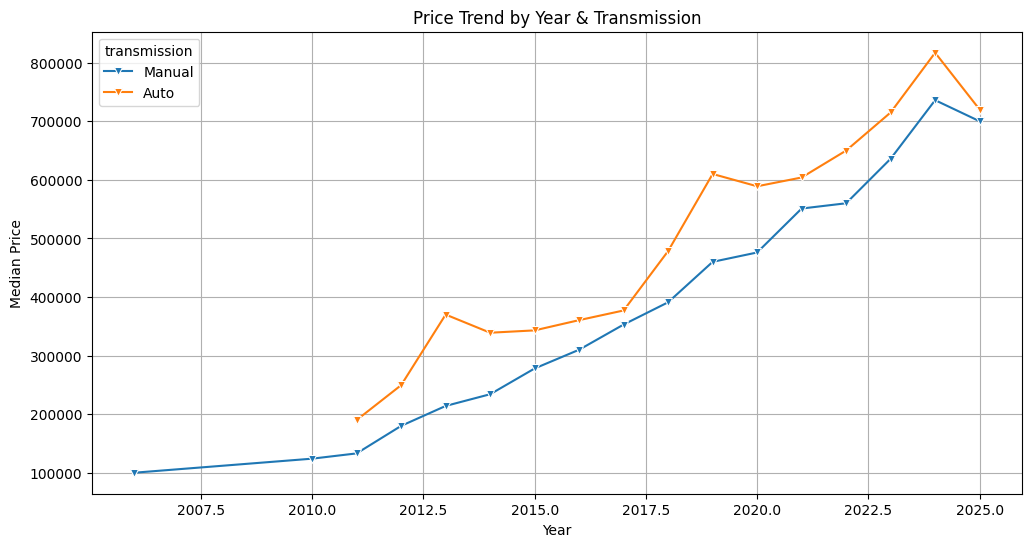

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='price', hue='transmission', estimator='median', marker='v', ci=None)
plt.title('Price Trend by Year & Transmission')
plt.xlabel('Year')
plt.ylabel('Median Price')
plt.grid(True)
plt.show()

#### Insight:

The "Auto" Premium: Across almost every year, the Automatic (blue line) sits higher than the Manual (orange line).

Widening Gap: Notice the years 2018-2020. The gap widens significantly (e.g., in 2019, Automatics median is ~₹6.1L vs Manuals ~₹4.6L). This suggests that demand for modern automatics is surging, allowing sellers to charge a ~30% premium on recent models.

### Does the fuel type preference change depending on the brand? (e.g., Is a Maruti CNG valuable?)

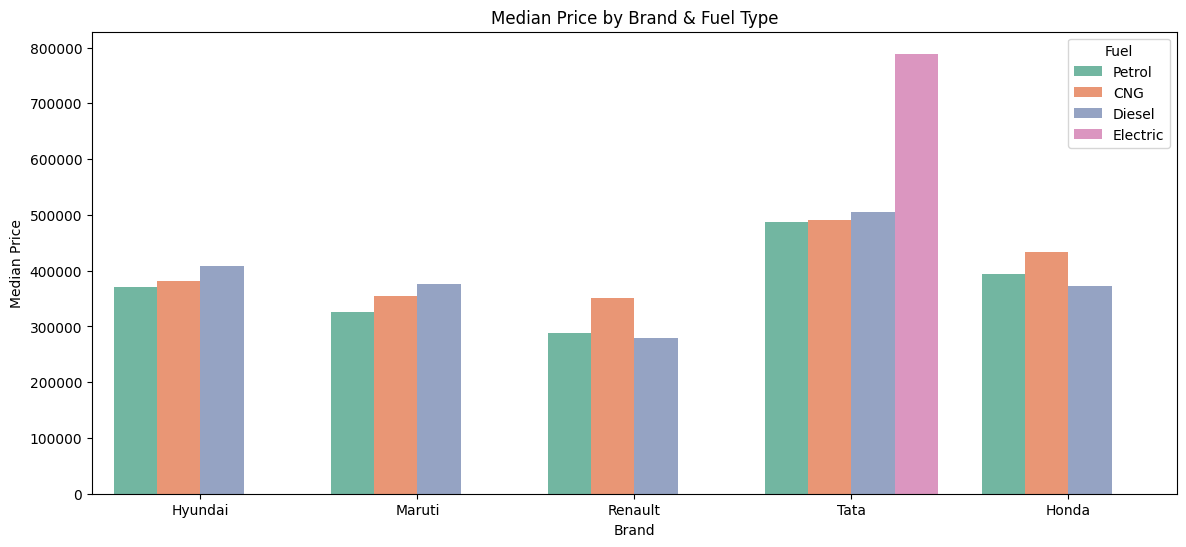

In [25]:
plt.figure(figsize=(14, 6))
top_5 = df['brand'].value_counts().head(5).index
df_top5 = df[df['brand'].isin(top_5)]

sns.barplot(data=df_top5, x='brand', y='price', hue='fuel', estimator='median', ci=None, palette='Set2')
plt.title('Median Price by Brand & Fuel Type')
plt.xlabel('Brand')
plt.ylabel('Median Price')
plt.legend(title='Fuel')
plt.show()

### Insight:

CNG Value: For brands like Maruti and Hyundai, the CNG variants (often fitted later or factory-fitted) hold very strong value, often matching or exceeding Petrol prices due to high demand for fuel efficiency.

Diesel Value: For Tata, Diesel cars command the highest prices (likely driven by models like Harrier/Safari/Nexon). For Renault, Diesel prices are surprisingly lower, possibly due to older discontinued models (like Duster diesel).